In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [3]:
table = np.loadtxt('uploads/pt_jet.txt',skiprows=0)

In [4]:
pt = table[:,0]
xsec = table[:,1]

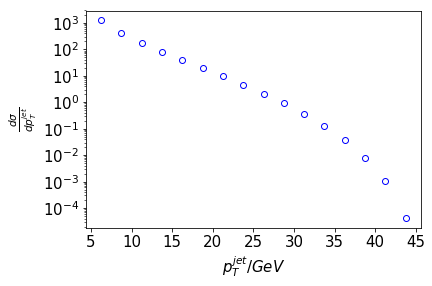

In [6]:
plt.plot(pt, xsec, 'bo', fillstyle='none')
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T^{jet}}$', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')

In [7]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [8]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 37.7 seconds


In [9]:
c = applyCut(a, '0.1 < y < 0.85', '0.1 < y < 0.85')

0.1 < y < 0.85 6783540  fraction kept: 18.7


In [31]:
def plot1d(df, var, low, high, interval, xlabel, yscale, label):

    xvar_array = toArrayFloat(5, 45, 2.5)
    xsec = np.mean(a['xsec'])
    ntrials = a['ntrials'][a.shape[0]-1]
    
    x, hist, xerr = getHist(df, var, xvar_array)
    y = hist*xsec*1e9/(ntrials*interval)
    plt.errorbar(x, y, xerr = xerr, fmt='none', color='b', elinewidth=1, label=label)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.yscale(yscale)
    plt.xlabel(xlabel, fontsize=15)
    
    print x
    return y

[6.25, 8.75, 11.25, 13.75, 16.25, 18.75, 21.25, 23.75, 26.25, 28.75, 31.25, 33.75, 36.25, 38.75, 41.25, 43.75]


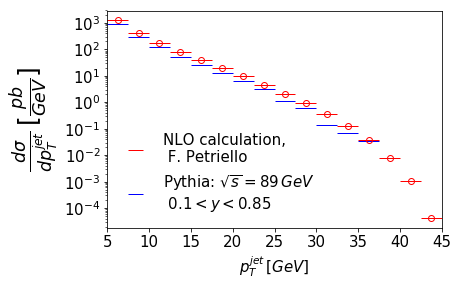

In [32]:
plt.plot(pt, xsec, 'ro', fillstyle='none')
plt.errorbar(pt, xsec, xerr=1.25, fmt='none', color='r', elinewidth=1, label='NLO calculation, \n F. Petriello')
y = plot1d(c, 'pt_jet', 5, 45, 2.5,'$p_T^{jet} \, [GeV]$','log','Pythia: $\sqrt{s} = 89 \, GeV$ \n $0.1 < y < 0.85$')
plt.yscale('log')
plt.xlim(left=5, right=45)
plt.ylabel(r'$\frac{d\sigma}{dp_T^{jet}} \, [\frac{pb}{GeV}]$', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')

In [30]:
print pt

[ 6.25  8.75 11.25 13.75 16.25 18.75 21.25 23.75 26.25 28.75 31.25 33.75
 36.25 38.75 41.25 43.75]


In [33]:
ratio = y / xsec

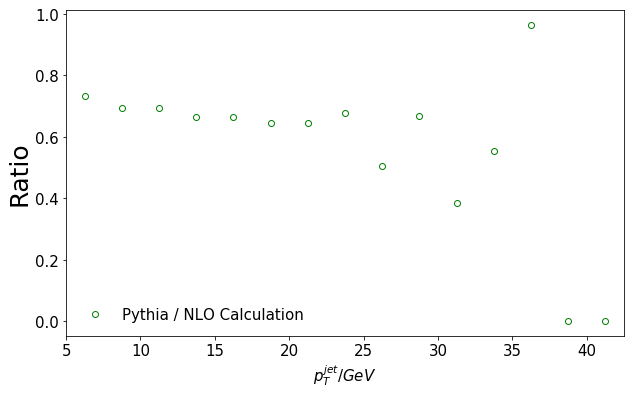

In [35]:
fig = plt.figure(figsize=(10,6))
plt.plot(pt, ratio, 'go', fillstyle='none', label='Pythia / NLO Calculation')
plt.xlim(left=5, right=42.5)
plt.xlabel('$p_T^{jet} / GeV$', fontsize=15)
plt.ylabel('Ratio', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='lower left')